In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import jax.numpy as jnp
from reusable.gp import BuildGP_Binomial, BuildGP_Weibull
from reusable.kernels import esq_kernel
import jax.random as random
from reusable.data import gen_gp_batches
from plotting.plots import plot_draws, plot_draws_hpdi

Starting, need 4
Looped: gen 4/4 , elapsed: 1.9026172161102295, last batch in 1.9026172161102295
Used 4, total time = 1.9026172161102295


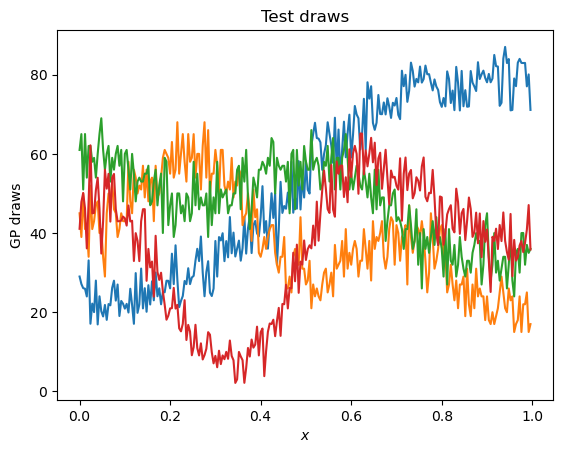

In [14]:

args = {
    # GP prior configuration
    "n": 250,
    "gp_kernel": esq_kernel,
    "rng_key": random.PRNGKey(2),
}
args.update(
    {  # so we can use the definition of n to define x
        "x": jnp.arange(0, 1, 1 / args["n"]),
        "length_prior_choice": "invgamma",
        "length_prior_arguments": {"concentration": 4.0, "rate": 1.0},
        "variance_prior_choice": "lognormal",
        "variance_prior_arguments": {"location": 0.0, "scale": 0.1},
        
        "binomial_N": 100
    }
)

rng_key = args["rng_key"]


rng_key, rng_key_train, rng_key_test = random.split(rng_key, 3)

gp = BuildGP_Binomial(
    args["binomial_N"],
    args["gp_kernel"],
    noise=True,
    length_prior_choice=args["length_prior_choice"],
    length_prior_args=args["length_prior_arguments"],
    variance_prior_choice=args["variance_prior_choice"],
    variance_prior_args=args["variance_prior_arguments"],
)

draws =  gen_gp_batches(args["x"], gp, args["gp_kernel"], 1, 4, rng_key_train)

plot_draws(draws[0], args["x"], "Test draws", "GP draws")
